In [1]:
# Import libraries
import numpy as np
import nltk
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read train and test dataset
columns = ['id', 'company', 'sentiment', 'tweet']
X_train = pd.read_csv("./Dataset/twitter_training.csv", names=columns, header=None)
X_test = pd.read_csv("./Dataset/twitter_validation.csv", names=columns, header=None)

X_train.drop("id", axis = 1, inplace=True)
X_test.drop("id", axis = 1, inplace=True)

X_train.head()

,company,sentiment,tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
def remove_null(X):
    for col in X.columns:
        if(X[col].isnull().sum() > 0):
            if(col == 'company'):
                X[col].fillna('Others', inplace=True)
            else:
                X.dropna(inplace=True)
    return X

In [4]:
X_train = remove_null(X_train)
X_train.shape

(73996, 3)

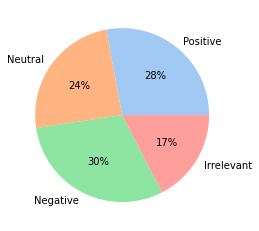

In [5]:
# Number of unique values and their distribution
unique_sentiment = X_train['sentiment'].unique()
colors = sns.color_palette('pastel')

# store count for each sentiment
count = []
temp_df = X_train.groupby('sentiment')
for sentiment in unique_sentiment:
    count.append(temp_df.get_group(sentiment).shape[0])


plt.pie(count, labels = unique_sentiment, colors = colors, autopct='%1.0f%%')
plt.show()

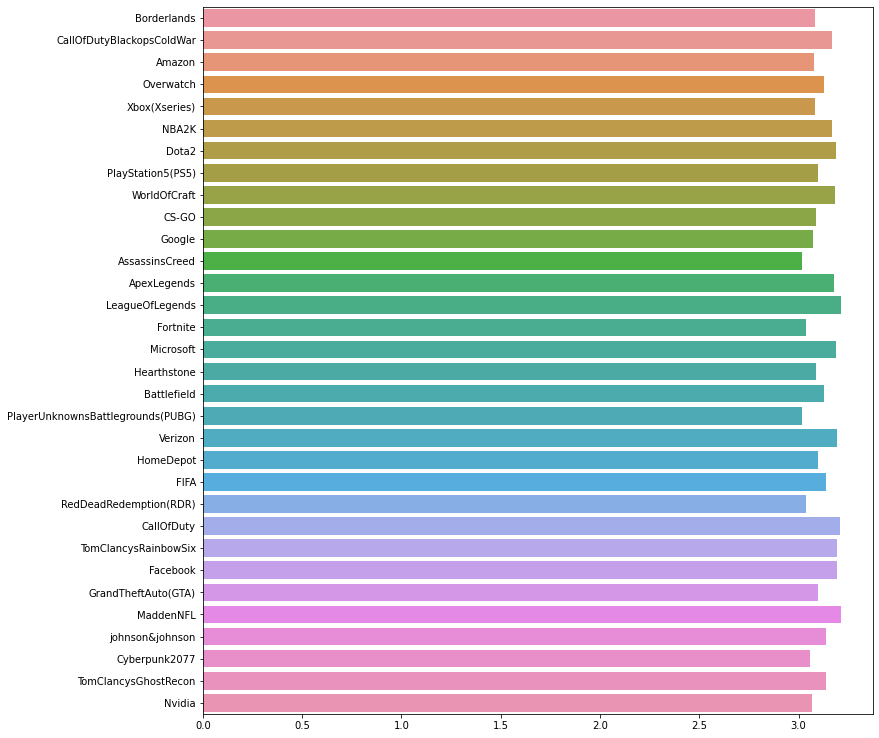

In [6]:
unique_companies = X_train['company'].unique()

temp_df = X_train.groupby('company')
percent = []
for index, company in enumerate(unique_companies):
    percent.append(temp_df.get_group(company).shape[0] * 100 / X_train.shape[0])

plt.figure(figsize=(12,13))
sns.barplot(x = percent, y = unique_companies)
plt.show()